In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Final_Data.csv')
# convert the date column to datetime
df['Tijdstip'] = pd.to_datetime(df['Tijdstip'])
# Assign days and months into new columns called Month and Day with dt accessor for faster computation
df['Month'] = df['Tijdstip'].dt.month
df['Day'] = df['Tijdstip'].dt.day


In [3]:
# For filtering the data faster.
df.sort_values(by=['Username','Month','Day'], inplace=True)

### Functions for implementing the formula, Normalize, Filter the data on month, day, and username properties.

In [5]:
def Filter(df, house):
    df = df[df['Username'] == house]
    return df 
def MonthFilter(df,month):
    mf = df[df['Month'] == month]
    return mf
def DayFilter(df,day):
    df = df[df['Day'] == day]
    return df
def Normalizer(df,max=96):
    shape = df.shape[0]
    if shape == max+1:
        L = df.Calculation.tolist()
        # select 2.to 96. element
        L = L[1:max]
        return L
    if shape == max+2:
        L = df.Calculation.tolist()
        # select 3.to 96. element
        L = L[1:max]     
        return     
    if shape == max-1:
        return df.Calculation.tolist()
    if shape == max-2:
        L = df.Calculation.tolist()
        L.append(0)
        return L 
    if shape == max:
        L = df.Calculation.tolist()
        L.pop()
        return L   
    if (shape > max+2) or  (shape < max-2):
        df = df[['Calculation','Tijdstip']]
        df.index = pd.to_datetime(df['Tijdstip'])        
        df.drop(['Tijdstip'],axis=1,inplace=True)
        display(df,"clean data")
        df = df.asfreq('15min')
        print("adsdasda")
        display(df,"Before interpolation")
        df = df.interpolate(method='from_derivatives', axis=0).ffill().bfill()
        display(df,"After interpolation")
        low_list = df.Calculation.tolist()
        return low_list
def Sum(low_list,normallist):
    if len(low_list) == 96:
        low_list = low_list[0:95]
    if len(normallist)== 96:
        normallist = normallist[0:95]
    Calculations_For_Returned = [x + y for x, y in zip(normallist, low_list)]
    return Calculations_For_Returned    
def BaseCalculator(df):    
    df['Waarde_Diff'] = df['Waarde'].diff()
    df['Tijdstip_Diff'] = df['Tijdstip'].diff()
    # make this one liner    
    df.Waarde_Diff.iloc[0] = df.Waarde_Diff.iloc[1]
    df.Tijdstip_Diff.iloc[0] = df.Tijdstip_Diff.iloc[1]   
    df['Hourly_Time_Diff'] = df['Tijdstip_Diff'].dt.seconds / 3600
    df = df[df['Hourly_Time_Diff'] * 60 > 2]
    df['Calculation'] = df['Waarde_Diff'] / df['Hourly_Time_Diff'] 
    return df

In [190]:
# Select 1 day 1 house data
dfselect = DayFilter(MonthFilter(Filter(df,"Utrecht0226"),6),6)

In [191]:
# Choose kWhReturnedLow values.
Returned_Low_Df = dfselect[(dfselect['Property']== 'kWhReturnedLow')]


In [192]:
Returned_Low_Df.head()

,Tijdstip,Username,Property,Waarde,Month,Day
9369143,2022-06-06 00:10:11,Utrecht0226,kWhReturnedLow,936.988,6,6
9369311,2022-06-06 00:25:15,Utrecht0226,kWhReturnedLow,936.988,6,6
9369452,2022-06-06 00:40:19,Utrecht0226,kWhReturnedLow,936.988,6,6
9369620,2022-06-06 00:55:23,Utrecht0226,kWhReturnedLow,936.988,6,6
9369761,2022-06-06 01:10:27,Utrecht0226,kWhReturnedLow,936.988,6,6


In [193]:
Returned_Low_Df.index = pd.to_datetime(Returned_Low_Df['Tijdstip'])

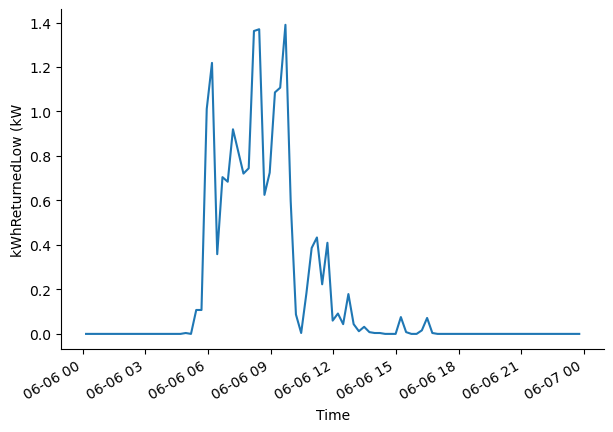

In [194]:
# Use BaseCalculator function to calculate the values and see the shape of the data
# rename x and y axis on this plot
BaseCalculator(Returned_Low_Df)['Calculation'].plot(x='Returned_Low_Df.Tijdstip',y='Calculation',figsize=(7,5))
plt.xlabel('Time')
plt.ylabel('kWhReturnedLow (kW')
# Clear top frame
plt.gca().spines['top'].set_visible(False)
# Clear right frame
plt.gca().spines['right'].set_visible(False)
plt.show()


In [195]:
# Choose PV_kWh data and use BaseCalculator function to calculate the values and see the shape of the data
For_Pv = dfselect[dfselect['Property'] == 'PV_kWh']

<AxesSubplot:>

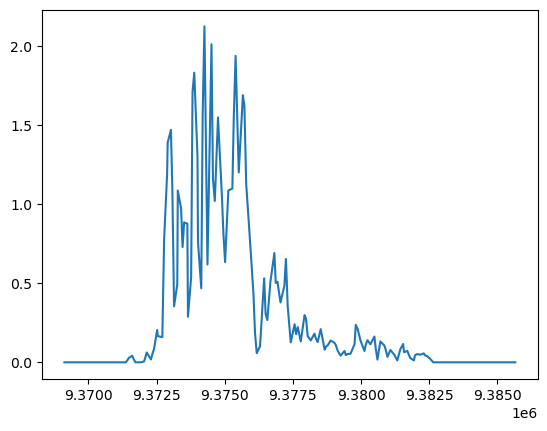

In [196]:
BaseCalculator(For_Pv)['Calculation'].plot()

In [197]:
For_Pv = BaseCalculator(For_Pv)
For_Pv

,Tijdstip,Username,Property,Waarde,Month,Day,Waarde_Diff,Tijdstip_Diff,Hourly_Time_Diff,Calculation
9369116,2022-06-06 00:05:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
9369208,2022-06-06 00:15:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
9369301,2022-06-06 00:25:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
9369425,2022-06-06 00:35:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
9369513,2022-06-06 00:45:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...
9385327,2022-06-06 23:25:00,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:10:00,0.166667,0.0
9385437,2022-06-06 23:32:24,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:07:24,0.123333,0.0
9385467,2022-06-06 23:35:00,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:02:36,0.043333,0.0
9385564,2022-06-06 23:45:00,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:10:00,0.166667,0.0


In [198]:
For_Pv.index = pd.to_datetime(For_Pv['Tijdstip'])

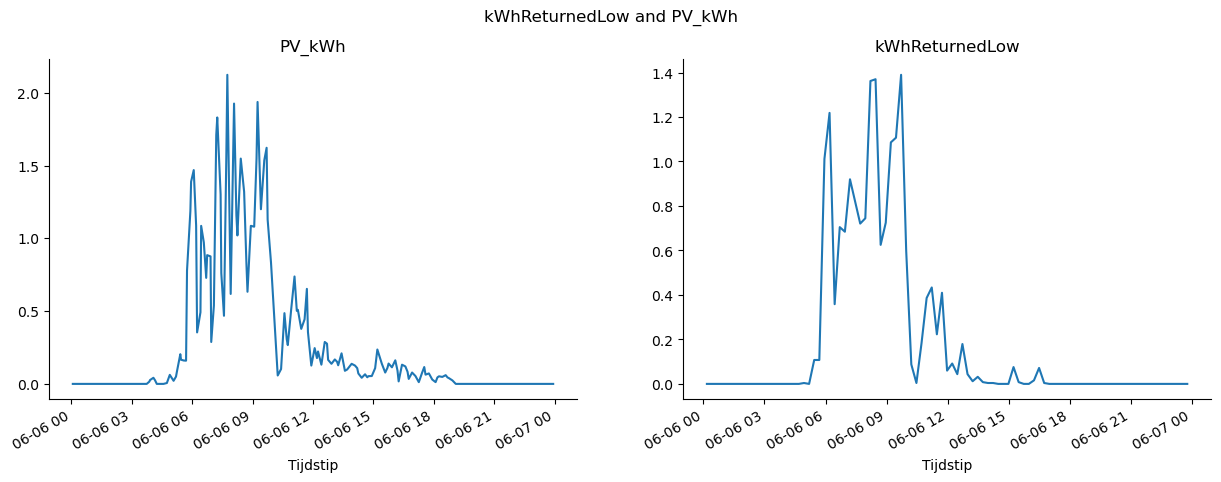

In [199]:
# Plot both side by side
fig, ax = plt.subplots(1,2,figsize=(15,5))
# Title Nmae
fig.suptitle('kWhReturnedLow and PV_kWh')
# titles to subplots
ax[0].set_title('PV_kWh')
ax[1].set_title('kWhReturnedLow')
BaseCalculator(For_Pv)['Calculation'].plot(x='For_Pv.Tijdstip',y='Calculation',ax=ax[0])
BaseCalculator(Returned_Low_Df)['Calculation'].plot(x='Returned_Low_Df.Tijdstip',y='Calculation',ax=ax[1])
# Clear frames of the plots
for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)    
plt.show()


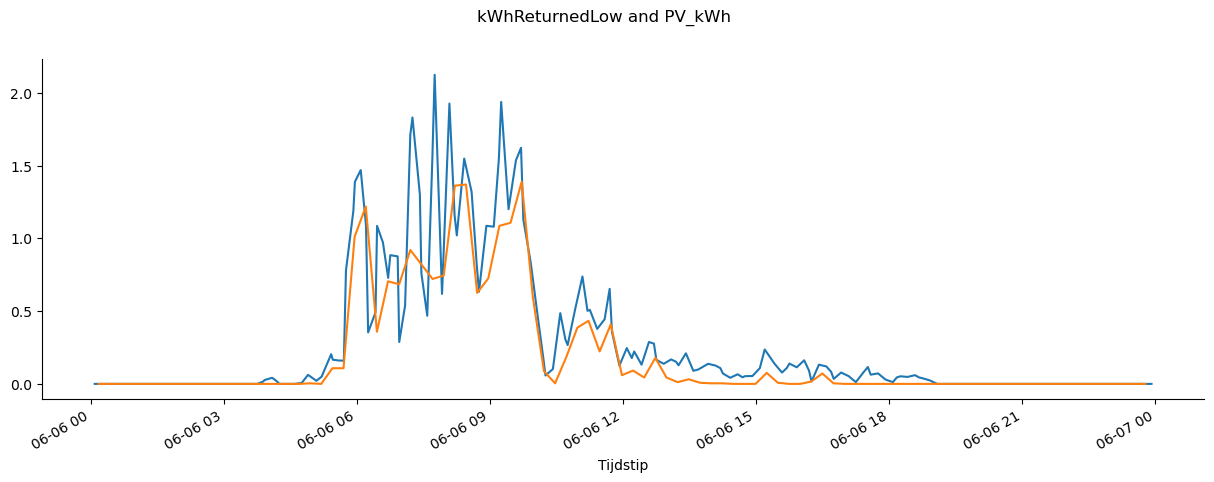

In [200]:
# Plot both over each other
fig, ax = plt.subplots(1,1,figsize=(15,5))
# Title name
fig.suptitle('kWhReturnedLow and PV_kWh')

BaseCalculator(For_Pv)['Calculation'].plot(x='For_Pv.Tijdstip',y='Calculation',ax=ax)

BaseCalculator(Returned_Low_Df)['Calculation'].plot(x='Returned_Low_Df.Tijdstip',y='Calculation',ax=ax)
# Clear frames of the plots
for i in range(2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


plt.show()

In [201]:
Returned_Low_Df.set_index('Tijdstip',inplace=True)

In [202]:
Returned_Low_Df = Returned_Low_Df.reset_index()

In [203]:
# Dates of Returned_Low_Df
pd.DataFrame(Returned_Low_Df['Tijdstip']).head(4)

,Tijdstip
0,2022-06-06 00:10:11
1,2022-06-06 00:25:15
2,2022-06-06 00:40:19
3,2022-06-06 00:55:23


In [204]:
For_Pv.set_index('Tijdstip',inplace=True)
For_Pv.reset_index(inplace=True)

In [205]:
For_Pv

,Tijdstip,Username,Property,Waarde,Month,Day,Waarde_Diff,Tijdstip_Diff,Hourly_Time_Diff,Calculation
0,2022-06-06 00:05:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
1,2022-06-06 00:15:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
2,2022-06-06 00:25:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
3,2022-06-06 00:35:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
4,2022-06-06 00:45:00,Utrecht0226,PV_kWh,3660.312,6,6,0.0,0 days 00:10:00,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...
174,2022-06-06 23:25:00,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:10:00,0.166667,0.0
175,2022-06-06 23:32:24,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:07:24,0.123333,0.0
176,2022-06-06 23:35:00,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:02:36,0.043333,0.0
177,2022-06-06 23:45:00,Utrecht0226,PV_kWh,3666.773,6,6,0.0,0 days 00:10:00,0.166667,0.0


### In order for energy consumption to be calculated, PV_kWh Returned_kWh and Used_kWh values ​​must be measured at the same minute, but this is not the case in our data. Normalizing and using values ​​directly leads to incorrect calculations. So we need to find the value of Pv at the time other measurements are made. The following method was used for this.

In [206]:
# Get dates from Returned Low readings and append them to PV readings.        
For_Pv = pd.concat([For_Pv, pd.DataFrame(Returned_Low_Df['Tijdstip'])], axis=0)

In [207]:
For_Pv

,Tijdstip,Username,Property,Waarde,Month,Day,Waarde_Diff,Tijdstip_Diff,Hourly_Time_Diff,Calculation
0,2022-06-06 00:05:00,Utrecht0226,PV_kWh,3660.312,6.0,6.0,0.0,0 days 00:10:00,0.166667,0.0
1,2022-06-06 00:15:00,Utrecht0226,PV_kWh,3660.312,6.0,6.0,0.0,0 days 00:10:00,0.166667,0.0
2,2022-06-06 00:25:00,Utrecht0226,PV_kWh,3660.312,6.0,6.0,0.0,0 days 00:10:00,0.166667,0.0
3,2022-06-06 00:35:00,Utrecht0226,PV_kWh,3660.312,6.0,6.0,0.0,0 days 00:10:00,0.166667,0.0
4,2022-06-06 00:45:00,Utrecht0226,PV_kWh,3660.312,6.0,6.0,0.0,0 days 00:10:00,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...
90,2022-06-06 22:46:18,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
91,2022-06-06 23:01:23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
92,2022-06-06 23:16:27,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
93,2022-06-06 23:31:31,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [208]:
# sort values.
For_Pv = For_Pv.sort_values(by=['Tijdstip'])
# Select Date and Value columns.
For_Pv = For_Pv[["Tijdstip", "Waarde"]]

In [209]:
# NaNs are the values the came from Returned_Low_Df and we need to fill them using the other PV_kWh values.
For_Pv.head(20)

,Tijdstip,Waarde
0,2022-06-06 00:05:00,3660.312
0,2022-06-06 00:10:11,NaN
1,2022-06-06 00:15:00,3660.312
2,2022-06-06 00:25:00,3660.312
1,2022-06-06 00:25:15,NaN
3,2022-06-06 00:35:00,3660.312
2,2022-06-06 00:40:19,NaN
4,2022-06-06 00:45:00,3660.312
5,2022-06-06 00:55:00,3660.312
3,2022-06-06 00:55:23,NaN


In [210]:
# set index to Tijdstip 
For_Pv.index = pd.to_datetime(For_Pv['Tijdstip'])
# drop Tijdstip 
For_Pv = For_Pv.drop(columns=['Tijdstip'],axis=1, inplace=False)

In [211]:
For_Pv

,Waarde
Tijdstip,
2022-06-06 00:05:00,3660.312
2022-06-06 00:10:11,NaN
2022-06-06 00:15:00,3660.312
2022-06-06 00:25:00,3660.312
2022-06-06 00:25:15,NaN
...,...
2022-06-06 23:32:24,3666.773
2022-06-06 23:35:00,3666.773
2022-06-06 23:45:00,3666.773


In [212]:
# drop duplicate indexes
For_Pv = For_Pv[~For_Pv.index.duplicated(keep='first')]
# Interpolate (Find the possible PV values) at the times that comes from Returned Low readings using existing PV readings with from_derivatives method.
Derivative = For_Pv.interpolate(method='from_derivatives',limit_area="inside", axis=0).bfill()

In [213]:
Derivative.head(4)

,Waarde
Tijdstip,
2022-06-06 00:05:00,3660.312
2022-06-06 00:10:11,3660.312
2022-06-06 00:15:00,3660.312
2022-06-06 00:25:00,3660.312


In [214]:
# Interpolate the times that comes from Returned Low readings using existing PV readings with ffill method. 
ffill = For_Pv.interpolate(method='ffill', axis=0).bfill()
ffill

,Waarde
Tijdstip,
2022-06-06 00:05:00,3660.312
2022-06-06 00:10:11,3660.312
2022-06-06 00:15:00,3660.312
2022-06-06 00:25:00,3660.312
2022-06-06 00:25:15,3660.312
...,...
2022-06-06 23:32:24,3666.773
2022-06-06 23:35:00,3666.773
2022-06-06 23:45:00,3666.773


<AxesSubplot:xlabel='Tijdstip'>

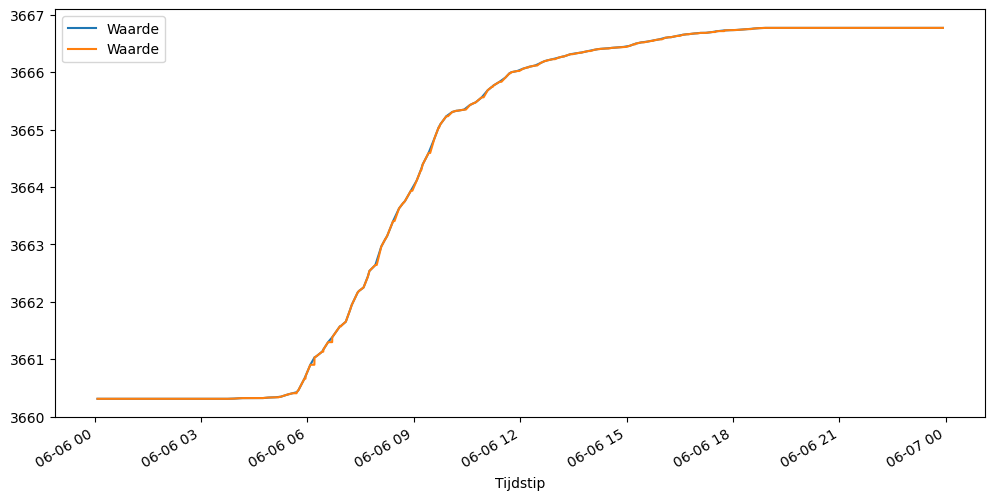

In [215]:
pd.concat([Derivative,ffill],axis=1).plot(figsize=(12,6))

### Comparison of different interpolation methods on the data.

<AxesSubplot:title={'center':'ffill'}, xlabel='Tijdstip', ylabel='Waarde'>

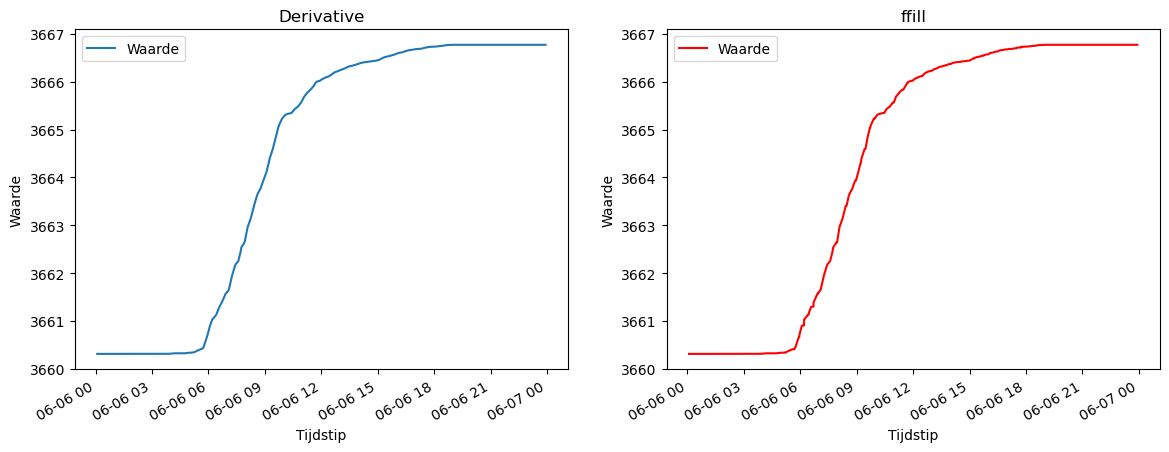

In [216]:
# Plot Derivative and ffill as col subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
# rename y axis
axes[0].set_ylabel('Waarde')    
axes[1].set_ylabel('Waarde')
Derivative.plot(ax=axes[0], title="Derivative")
# make ffill red
ffill.plot(ax=axes[1], title="ffill",color='red')

DatetimeIndex(['2022-06-06 00:05:00', '2022-06-06 00:10:11',
               '2022-06-06 00:15:00', '2022-06-06 00:25:00',
               '2022-06-06 00:25:15', '2022-06-06 00:35:00',
               '2022-06-06 00:40:19', '2022-06-06 00:45:00',
               '2022-06-06 00:55:00', '2022-06-06 00:55:23',
               ...
               '2022-06-06 23:05:00', '2022-06-06 23:15:00',
               '2022-06-06 23:16:27', '2022-06-06 23:25:00',
               '2022-06-06 23:31:31', '2022-06-06 23:32:24',
               '2022-06-06 23:35:00', '2022-06-06 23:45:00',
               '2022-06-06 23:46:35', '2022-06-06 23:55:00'],
              dtype='datetime64[ns]', name='Tijdstip', length=274, freq=None)

In [219]:
# Set time to index
For_Pv['Tijdstip'] = For_Pv.index
# Get interpolated datas form Derivative and ffill and append them to For_Pv as columns.
For_Pv["Derivative_Waarde"] = Derivative["Waarde"]
For_Pv["ffil_Waarde"] = ffill["Waarde"]

In [220]:
# Pv measurements with 2 different interpolated values.
For_Pv

,Waarde,Tijdstip,Derivative_Waarde,ffil_Waarde
Tijdstip,,,,
2022-06-06 00:05:00,3660.312,2022-06-06 00:05:00,3660.312,3660.312
2022-06-06 00:10:11,NaN,2022-06-06 00:10:11,3660.312,3660.312
2022-06-06 00:15:00,3660.312,2022-06-06 00:15:00,3660.312,3660.312
2022-06-06 00:25:00,3660.312,2022-06-06 00:25:00,3660.312,3660.312
2022-06-06 00:25:15,NaN,2022-06-06 00:25:15,3660.312,3660.312
...,...,...,...,...
2022-06-06 23:32:24,3666.773,2022-06-06 23:32:24,3666.773,3666.773
2022-06-06 23:35:00,3666.773,2022-06-06 23:35:00,3666.773,3666.773
2022-06-06 23:45:00,3666.773,2022-06-06 23:45:00,3666.773,3666.773


### Select only the dates that came from  Returned_Low_Df because every element that needed for calculatin Energy Consumption should be measured in same time.

In [221]:
# Select the dates that comes from Returned Low readings from all of the dates.
For_Pv = For_Pv[For_Pv['Tijdstip'].isin(Returned_Low_Df['Tijdstip'])]

In [222]:
For_Pv

,Waarde,Tijdstip,Derivative_Waarde,ffil_Waarde
Tijdstip,,,,
2022-06-06 00:10:11,NaN,2022-06-06 00:10:11,3660.312,3660.312
2022-06-06 00:25:15,NaN,2022-06-06 00:25:15,3660.312,3660.312
2022-06-06 00:40:19,NaN,2022-06-06 00:40:19,3660.312,3660.312
2022-06-06 00:55:23,NaN,2022-06-06 00:55:23,3660.312,3660.312
2022-06-06 01:10:27,NaN,2022-06-06 01:10:27,3660.312,3660.312
...,...,...,...,...
2022-06-06 22:46:18,NaN,2022-06-06 22:46:18,3666.773,3666.773
2022-06-06 23:01:23,NaN,2022-06-06 23:01:23,3666.773,3666.773
2022-06-06 23:16:27,NaN,2022-06-06 23:16:27,3666.773,3666.773


In [223]:
# Find the Differences of the interpolated values and time.
For_Pv['Derivative_Waarde_Diff'] = For_Pv['Derivative_Waarde'].diff()
For_Pv["ffill_diff"] = For_Pv["ffil_Waarde"].diff()
For_Pv['PV_kWh_Time_Diff'] = For_Pv['Tijdstip'].diff()
# Put 2nd row to 1st row because there is no difference for the first row.
For_Pv.Derivative_Waarde_Diff.iloc[0] = For_Pv.Derivative_Waarde_Diff.iloc[1]
For_Pv.PV_kWh_Time_Diff.iloc[0] = For_Pv.PV_kWh_Time_Diff.iloc[1]       
For_Pv.ffill_diff.iloc[0] = For_Pv.ffill_diff.iloc[1]

In [225]:
For_Pv

,Waarde,Tijdstip,Derivative_Waarde,ffil_Waarde,Derivative_Waarde_Diff,ffill_diff,PV_kWh_Time_Diff
Tijdstip,,,,,,,
2022-06-06 00:10:11,NaN,2022-06-06 00:10:11,3660.312,3660.312,0.0,0.0,0 days 00:15:04
2022-06-06 00:25:15,NaN,2022-06-06 00:25:15,3660.312,3660.312,0.0,0.0,0 days 00:15:04
2022-06-06 00:40:19,NaN,2022-06-06 00:40:19,3660.312,3660.312,0.0,0.0,0 days 00:15:04
2022-06-06 00:55:23,NaN,2022-06-06 00:55:23,3660.312,3660.312,0.0,0.0,0 days 00:15:04
2022-06-06 01:10:27,NaN,2022-06-06 01:10:27,3660.312,3660.312,0.0,0.0,0 days 00:15:04
...,...,...,...,...,...,...,...
2022-06-06 22:46:18,NaN,2022-06-06 22:46:18,3666.773,3666.773,0.0,0.0,0 days 00:15:04
2022-06-06 23:01:23,NaN,2022-06-06 23:01:23,3666.773,3666.773,0.0,0.0,0 days 00:15:05
2022-06-06 23:16:27,NaN,2022-06-06 23:16:27,3666.773,3666.773,0.0,0.0,0 days 00:15:04


In [228]:
# Find the difference that is usable on the formula.(Derivative_Waarde_Diff / PV_kWh_Time_Diff) - Converted to hours.
For_Pv['PV_kWh_Time_Diff'] = For_Pv['PV_kWh_Time_Diff'].dt.seconds / 3600 
For_Pv['Calculation_Derivative'] = For_Pv['Derivative_Waarde_Diff'] / For_Pv['PV_kWh_Time_Diff']
For_Pv['Calculation_ffill'] = For_Pv['ffill_diff'] / For_Pv['PV_kWh_Time_Diff']
For_Pv

,Waarde,Tijdstip,Derivative_Waarde,ffil_Waarde,Derivative_Waarde_Diff,ffill_diff,PV_kWh_Time_Diff,Calculation_Derivative,Calculation_ffill
Tijdstip,,,,,,,,,
2022-06-06 00:10:11,NaN,2022-06-06 00:10:11,3660.312,3660.312,0.0,0.0,0.251111,0.0,0.0
2022-06-06 00:25:15,NaN,2022-06-06 00:25:15,3660.312,3660.312,0.0,0.0,0.251111,0.0,0.0
2022-06-06 00:40:19,NaN,2022-06-06 00:40:19,3660.312,3660.312,0.0,0.0,0.251111,0.0,0.0
2022-06-06 00:55:23,NaN,2022-06-06 00:55:23,3660.312,3660.312,0.0,0.0,0.251111,0.0,0.0
2022-06-06 01:10:27,NaN,2022-06-06 01:10:27,3660.312,3660.312,0.0,0.0,0.251111,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-06-06 22:46:18,NaN,2022-06-06 22:46:18,3666.773,3666.773,0.0,0.0,0.251111,0.0,0.0
2022-06-06 23:01:23,NaN,2022-06-06 23:01:23,3666.773,3666.773,0.0,0.0,0.251389,0.0,0.0
2022-06-06 23:16:27,NaN,2022-06-06 23:16:27,3666.773,3666.773,0.0,0.0,0.251111,0.0,0.0


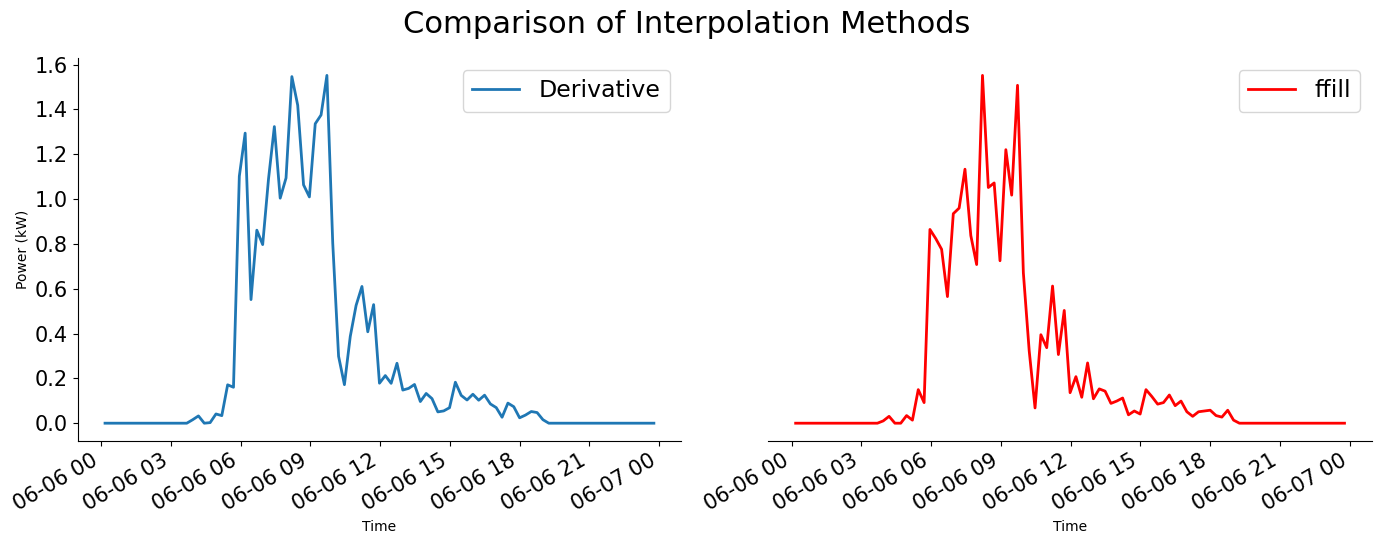

In [229]:
# Do same code under here with matplotlib.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))
# Set a general title
fig.suptitle("Comparison of Interpolation Methods", fontsize=22)

axes[0].set_ylabel('Power (kW)')

# Add legend to the plot
# name legends
# plot 
For_Pv['Calculation_Derivative'].plot(ax=axes[0],linewidth=2)
For_Pv['Calculation_ffill'].plot(ax=axes[1], color = 'red',linewidth=2)
# make titles bigger
axes[0].title.set_size(15)
axes[1].title.set_size(15)
# Align titles to middle
axes[0].title.set_position([.5, 1.05])
axes[1].title.set_position([.5, 1.05])

# move y axis to further left, seperate y and x axis
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# clear left frame for 2.plot
axes[1].spines['left'].set_visible(False)
# Clear left data points for 2.plot
axes[1].get_yaxis().set_ticks([])
# Add Legend
axes[0].legend(['Derivative'],loc='upper right',prop={'size': 17})
axes[1].legend(['ffill'], loc='upper right',prop={'size': 17})
# set xaxis and y axis font size bigger
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)
# rename xaxis
axes[0].set_xlabel('Time')
axes[1].set_xlabel('Time')
fig.tight_layout()


In [231]:
Returned_Low_Df = BaseCalculator(Returned_Low_Df)

In [233]:
Returned_Low_Df.set_index('Tijdstip', inplace=True)

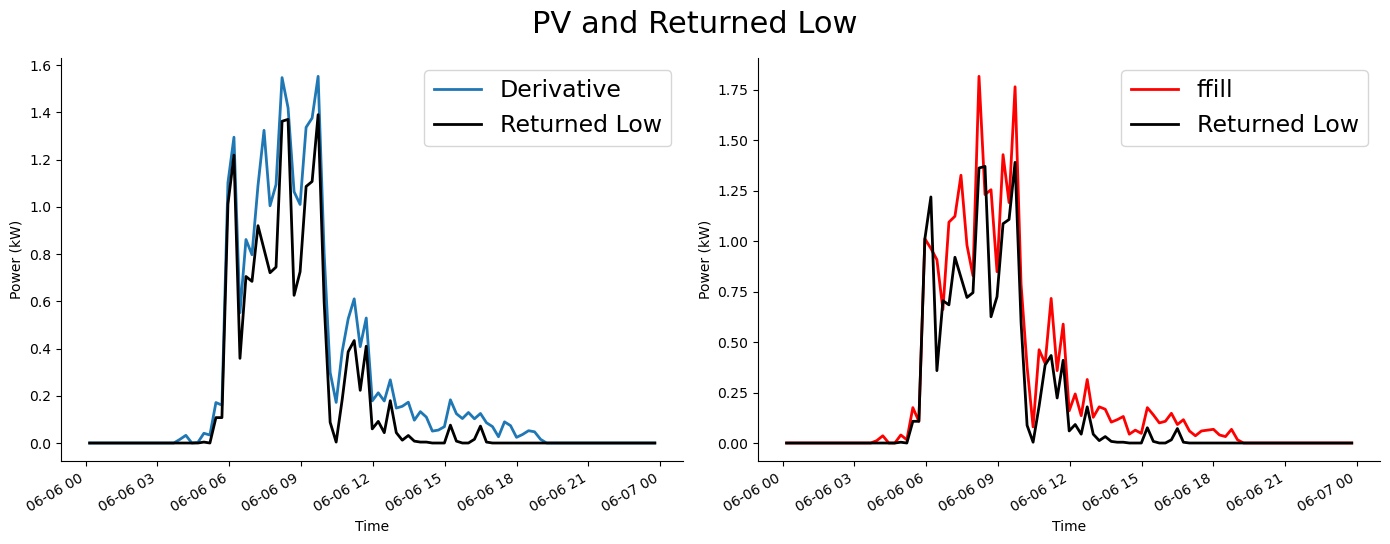

In [234]:
# Plot comparison of the interpolated values and Returned_Low_Df['Calculation] as 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))
# Add a general title
fig.suptitle("PV and Returned Low", fontsize=22)
axes[0].set_ylabel('Power (kW)')
axes[1].set_ylabel('Power (kW)')
# rename y  axis
# axes[0].set_ylabel('Power (kW)')

For_Pv['Calculation_Derivative'].plot(ax=axes[0],linewidth=2)
Returned_Low_Df['Calculation'].plot(ax=axes[0], color = 'black',linewidth=2)

For_Pv['Calculation_ffill'].plot(ax=axes[1],linewidth=2, color = 'red')
Returned_Low_Df['Calculation'].plot(ax=axes[1], color = 'black',linewidth=2)


# Clear all frames

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Add legend
axes[0].legend(['Derivative','Returned Low'],loc='upper right',prop={'size': 17})
axes[1].legend(['ffill','Returned Low'], loc='upper right',prop={'size': 17})
# rename xaxis
axes[0].set_xlabel('Time')
axes[1].set_xlabel('Time')
fig.tight_layout()
#fig.show()

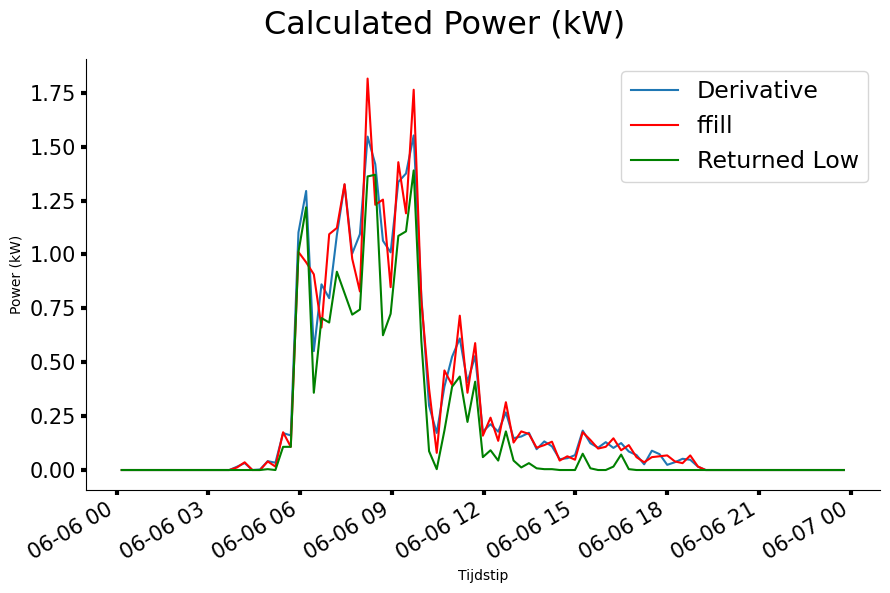

In [235]:
# Plot 2 signals on the same plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
# Set a general title
fig.suptitle('Calculated Power (kW)', fontsize=23)
# set y label
axes.set_ylabel('Power (kW)')
# Clear right and top frames
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)


For_Pv['Calculation_Derivative'].plot()
For_Pv['Calculation_ffill'].plot(color = 'red')
Returned_Low_Df['Calculation'].plot(color = 'green')    




# Add legends
axes.legend(['Derivative','ffill','Returned Low'],loc='upper right',prop={'size': 17})
# set xaxis and y axis font size bigger
axes.tick_params(axis='both', which='major', labelsize=15)
# make x and y axis thick
axes.tick_params(axis='both', which='major', width=3)
# start y axis from 0
#axes.set_ylim(bottom=0)
fig.tight_layout()




In [346]:
Returned_Low = Returned_Low_Df['Calculation'].values

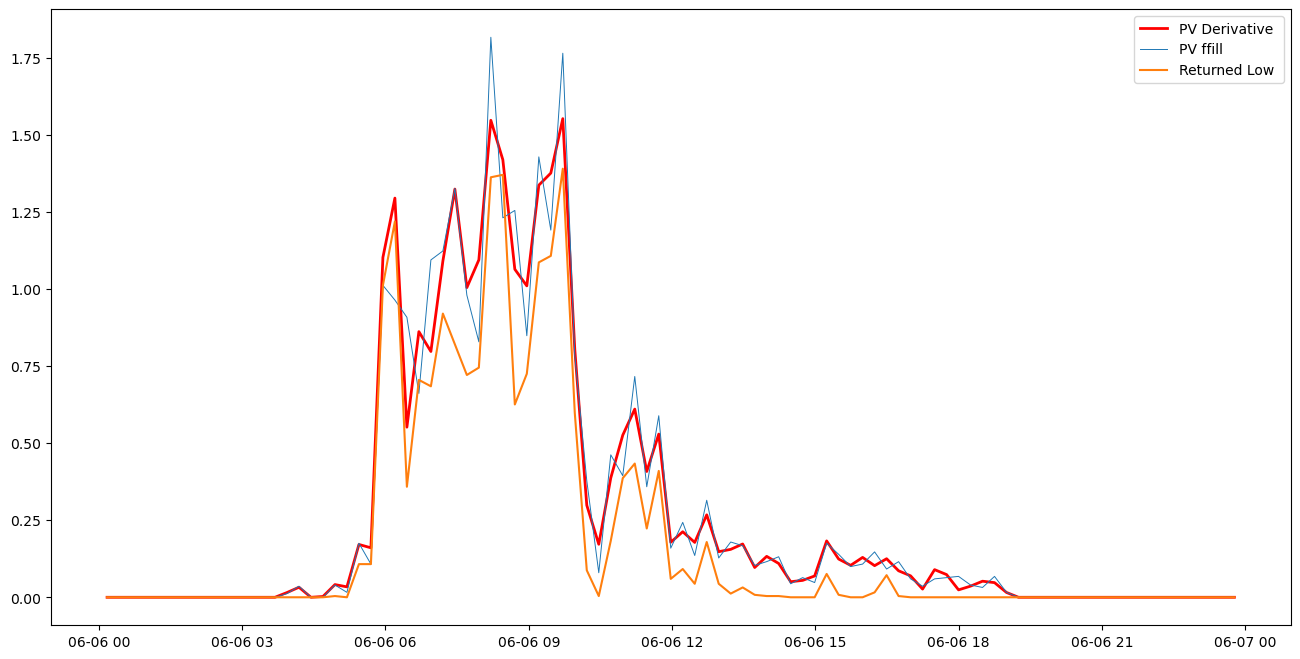

In [236]:
# Plot them overlapped with matplotlib
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(For_Pv.index, For_Pv['Calculation_Derivative'], label="PV Derivative", color='red', linewidth=2)
ax.plot(For_Pv.index, For_Pv['Calculation_ffill'], label="PV ffill", linewidth=0.7)
ax.plot( Returned_Low_Df['Calculation'], label="Returned Low ")
# set figsize
fig.set_size_inches(16, 8)
ax.legend()

In [237]:
def PV_Interpolation(Calculations_For_Pv,ffillcalcs,Calculations_For_Returned):
    # Select values that closer to truth from that 2 interpolation methods. According to their comparison with Calculations_For_Returned.
    # Calculations_For_Pv list comes from derivative method and ffillcalcs list comes from ffill method.
    for i in range(len(Calculations_For_Pv)-1):
        # If Calculations_For_Pv is true, select it.
        # ilk if'e girerse elif e girmiyor.
        if Calculations_For_Pv[i] > Calculations_For_Returned[i]:
            Calculations_For_Pv[i] = Calculations_For_Pv[i]
        
        elif ffillcalcs[i] > Calculations_For_Returned[i]:
            #print("///////////////////////////////////////")
            avg = (ffillcalcs[i]*0.7 + Calculations_For_Pv[i]*0.3) 
            Calculations_For_Pv[i] = avg
            #print("avg",avg) 
            
        elif (Calculations_For_Pv[i]  < Calculations_For_Returned[i]) and (ffillcalcs[i] < Calculations_For_Returned[i]):            
            # if both normalization are wrong at that time, find the difference between them and add the difference to the bigger one for making pv closer to real.
            diff = abs(Calculations_For_Pv[i] - ffillcalcs[i])
            # add diff to the bigger one
            Calculations_For_Pv[i] = Calculations_For_Pv[i] + diff*1.1 if Calculations_For_Pv[i] > ffillcalcs[i] else ffillcalcs[i] + diff*1.1
        else:
            Calculations_For_Pv[i] = Calculations_For_Pv[i]
    return Calculations_For_Pv 

In [240]:
# Get the Calculations for PV that calculated from derivative method and ffill method.
Calculations_For_Pv = For_Pv['Calculation_Derivative'].values
ffillcalcs = For_Pv['Calculation_ffill'].values 
Calculations_For_Returned = Returned_Low_Df['Calculation'].values

# Call the function
Calculations_For_Pv_new = PV_Interpolation(Calculations_For_Pv,ffillcalcs,Calculations_For_Returned)

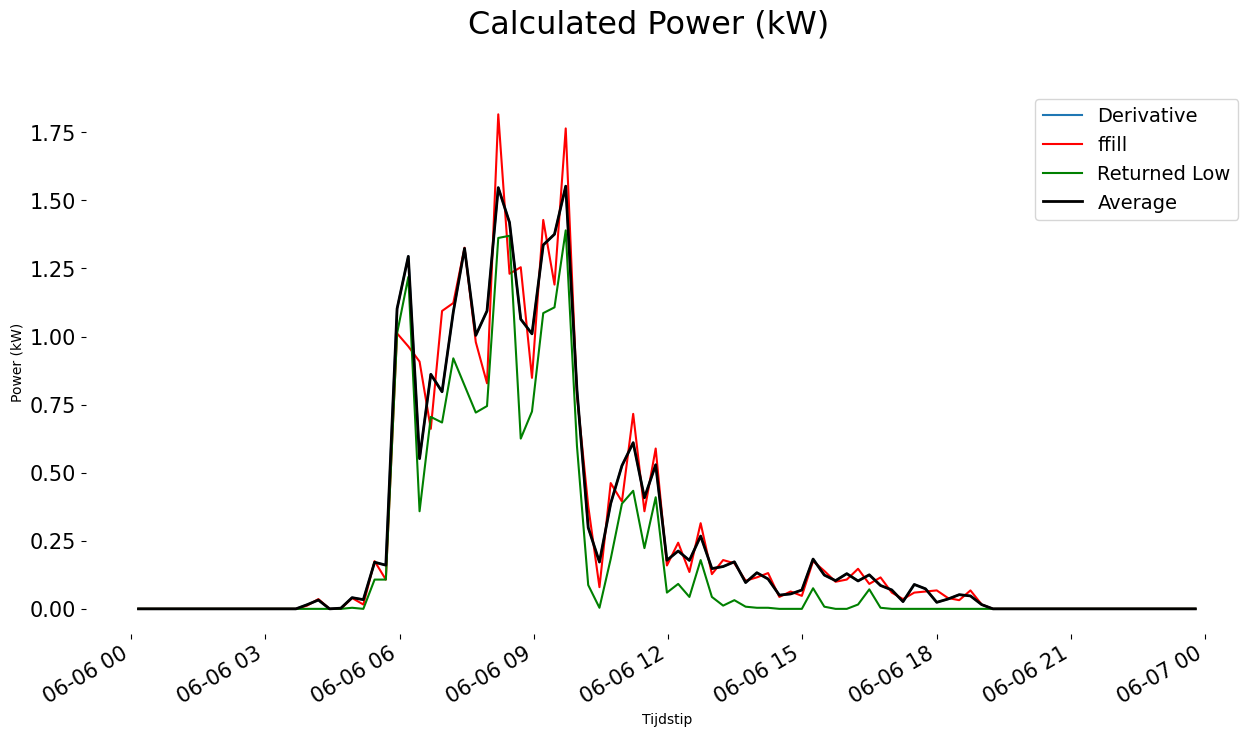

In [249]:
# Plot all 4 signals on the same plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
# Set a general title
fig.suptitle('Calculated Power (kW)', fontsize=23)
# set y label
axes.set_ylabel('Power (kW)')
# Clear right and top frames
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
# clear other frames
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)

# plot
For_Pv['Calculation_Derivative'].plot()
For_Pv['Calculation_ffill'].plot(color = 'red')
Returned_Low_Df['Calculation'].plot(color = 'green')
axes.plot(For_Pv.index, Calculations_For_Pv_new, label="PV Interpolation", color='black', linewidth=2)
# Add legends
axes.legend(['Derivative','ffill','Returned Low','Average'],loc='upper right',prop={'size': 14})
# set xaxis and y axis font size bigger
axes.tick_params(axis='both', which='major', labelsize=15)
# make x and y axis thick